In [198]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist
from scipy.stats import pearsonr

In [199]:
df = pd.read_csv('feature_table.csv')

In [205]:
df

,Unnamed: 0,shortKey,ID,Term,MajorCode,Classification,ResTuit,Gender,AdmitClass,EthnicityCode,USresident,is_male,alph_term,number_courses_so_far,terms_so_far,running_gpa,quarter_count,gpa_last_quarter,drops_out_in_next_year
0,0,0000200d607da1bd8ea52eb48c32b44b32d726b622c9e8...,0x8862C232D0C780013C83CCCC6962C41FBFE74DC2,00F,193,UFR,R,M,UFR,WH,R,1,0.75,1,0,-1.000000,1,-1.000000,0
1,1,000093735b6a3375f15c1fe7637330957e099751f89c7f...,0xF6CFA9EA21680AA98CE09972CF0BAC1F330D8E8B,05F,303,USR,R,M,UJR,CA,R,1,5.75,2,1,0.000000,2,0.000000,1
2,2,000109bf56d6391acf3869b3735966f1c3561fddb6f207...,0x4F5A4FD604103B643670F731D982264F4669BAC2,12W,153,USO,N,F,UFR,WH,N,0,12.00,5,4,3.150000,5,3.300000,1
3,3,00011befdc16ce447177f612c6801c82ca0918ba3b05c4...,0x6378CE354D056F16379C3286FEA5416D9141953F,05W,193,USO,R,M,UFR,CA,R,1,5.00,2,1,2.000000,2,2.000000,0
4,4,000167660de678d7f32fc80f9945ddef98f0513f241f02...,0x4872CC43ED5F6CE6DC238EFB650FB3CD24CB6077,07W,336,UFR,R,M,UFR,,R,1,7.00,2,1,3.300000,2,3.300000,0
5,5,000208a074e0dee44eac86c3c8fa354d855fd5b75a7566...,0x6931D539AED046A9A563DAE0AAD62483AB055DF0,06W,300,USO,R,M,UFR,LA,R,1,6.00,5,4,2.575000,5,2.000000,1
6,6,0002242f56ef94b64a51d4d3523ebf4322db5efbff1c3d...,0xD8318E148FCC2C595A92973D36AF1526DE7B3A22,04S,0,UJR,R,M,USO,WH,R,1,4.25,3,2,4.000000,3,4.000000,0
7,7,0002b64ee3bd88263c06d853e8cdaf594f41eed5f7e07b...,0x3FDEDEB6F1D26298205CC5A2D9B9562168169244,02W,0,UJR,R,M,UFR,PI,R,1,2.00,3,2,1.700000,3,2.700000,1
8,8,00033320768e1939d1bb8de37ef76fb05771f8e2c51cdf...,0x9E30336B5AB6F38DB5889CC07A3885C4118C81FA,08F,72,USO,N,F,USO,MA,R,0,8.75,1,0,-1.000000,1,-1.000000,0
9,9,000350044993a2a51ee59e9dd2efe5f384b9a2fbf59197...,0x40386B4691D233C5275F70447ACE8DFD1CF4EBB7,01W,201,USO,R,M,UFR,WH,R,1,1.00,4,3,2.233333,4,2.000000,1


In [201]:
feat_list = ['is_male', 'alph_term', 'number_courses_so_far', 'terms_so_far', 'running_gpa', 'quarter_count', 'gpa_last_quarter']
sub_df = df[feat_list + ['drops_out_in_next_year']]
samp_sub_df = sub_df.sample(frac = 1000.0/len(sub_df))
feat_df = samp_sub_df[feat_list]
drop_list = samp_sub_df.drops_out_in_next_year

In [202]:
sim_mtx_eucl = np.zeros((len(samp_sub_df), len(samp_sub_df)))
eucl_values = []
samp_mtx = samp_sub_df.as_matrix()
Y_dict = {}

metric_names = ['euclidean', 'cityblock', 'minkowski', 'cosine', 'hamming', 'jaccard', 'chebyshev', 
                'correlation', 'canberra', 'braycurtis','mahalanobis', 'matching', 'dice', 
                'kulsinski']

for name in metric_names:
    Y_dict[name] = pdist(feat_df.as_matrix(), name)

Y_drop = [int(i==0) for i in pdist(zip(drop_list,drop_list), 'cityblock')]

# Correlation between metrics and dropout similarities

In [203]:
for name in metric_names:
    print name.upper()
    print pearsonr(Y_dict[name], Y_drop)[0]
    print '------'

EUCLIDEAN
-0.0959967128348
------
CITYBLOCK
-0.101974361152
------
MINKOWSKI
-0.0959967128348
------
COSINE
-0.0457500315978
------
HAMMING
-0.0386154418994
------
JACCARD
-0.0325214046235
------
CHEBYSHEV
-0.0714061147486
------
CORRELATION
-0.0618401979944
------
CANBERRA
-0.0271202624911
------
BRAYCURTIS
-0.0344782215592
------
MAHALANOBIS
nan
------
MATCHING
-0.000742446737578
------
DICE
0.00111205532632
------
KULSINSKI
0.0226967810952
------


euclidean


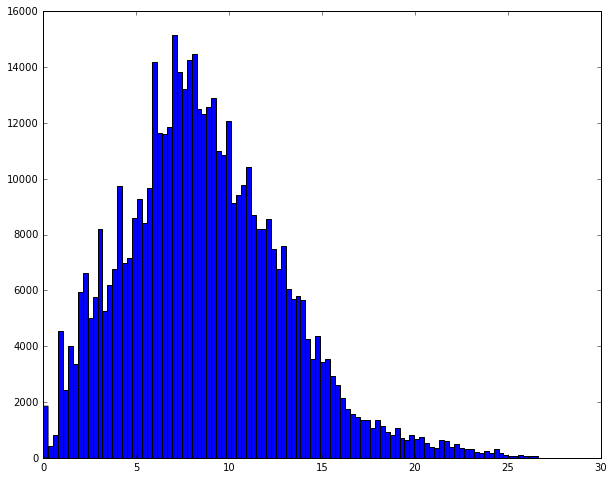

cityblock


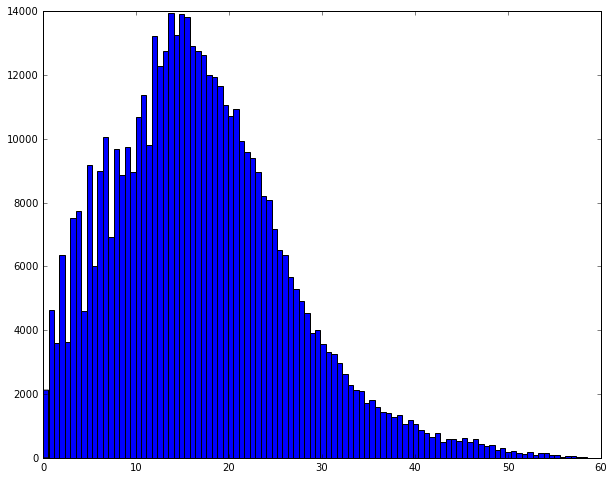

minkowski


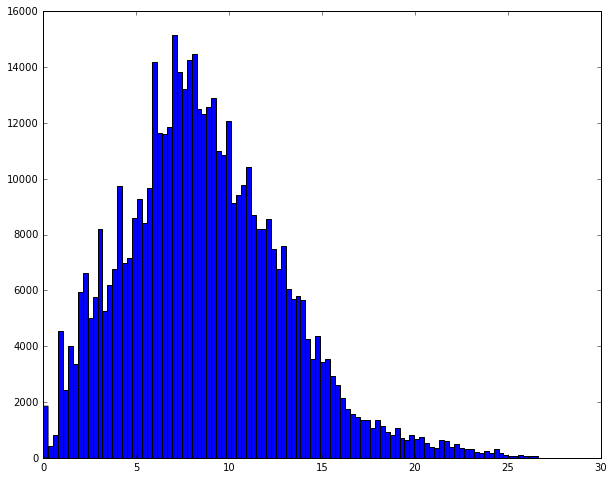

cosine


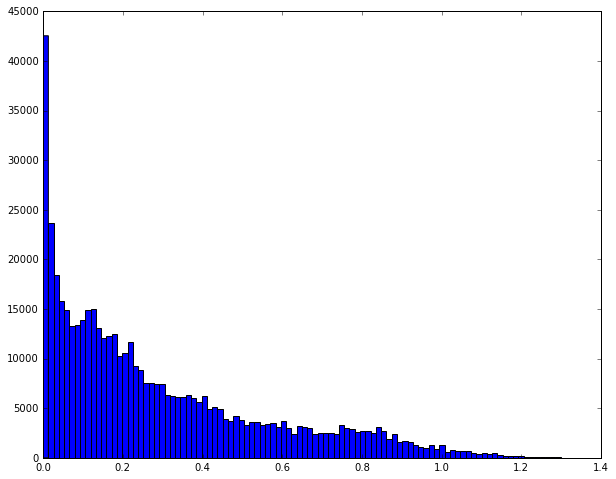

hamming


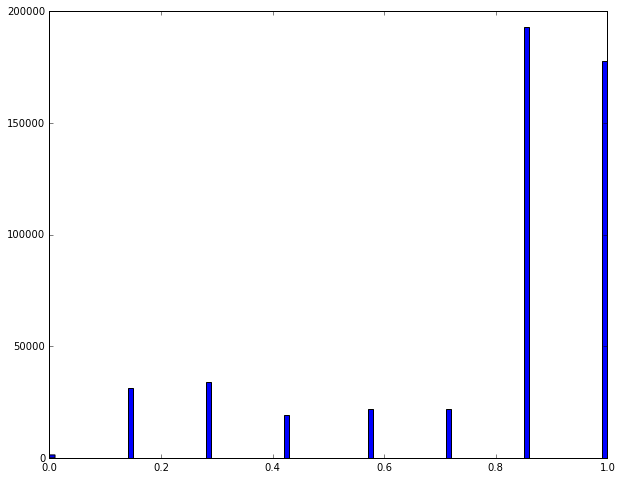

jaccard


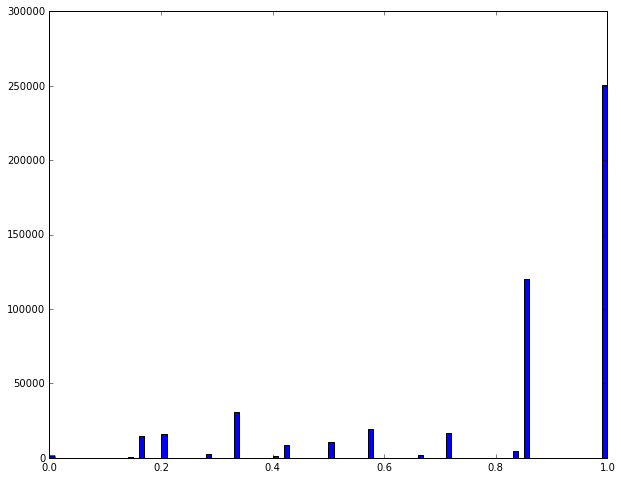

chebyshev


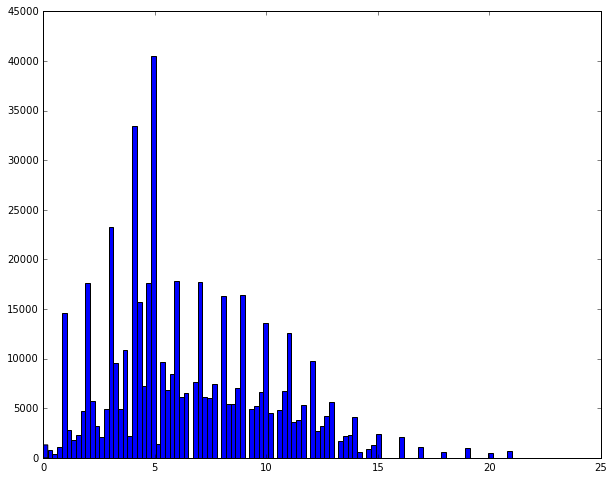

correlation


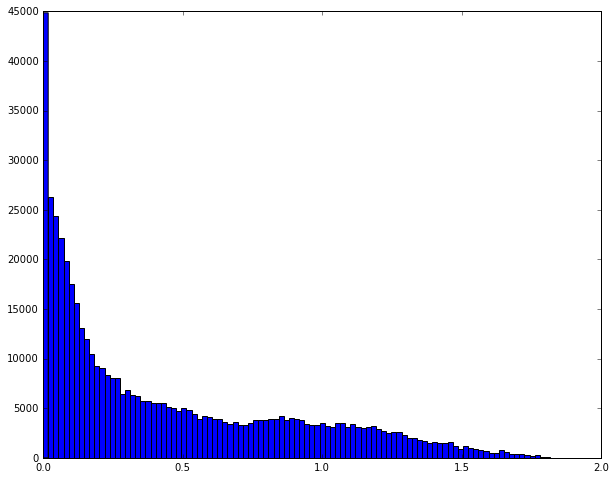

canberra


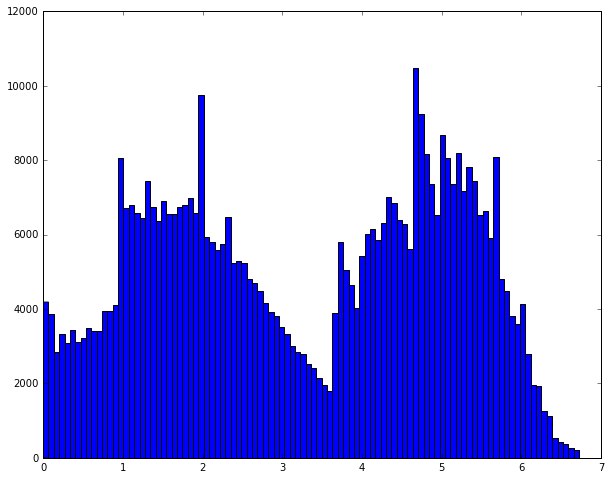

braycurtis


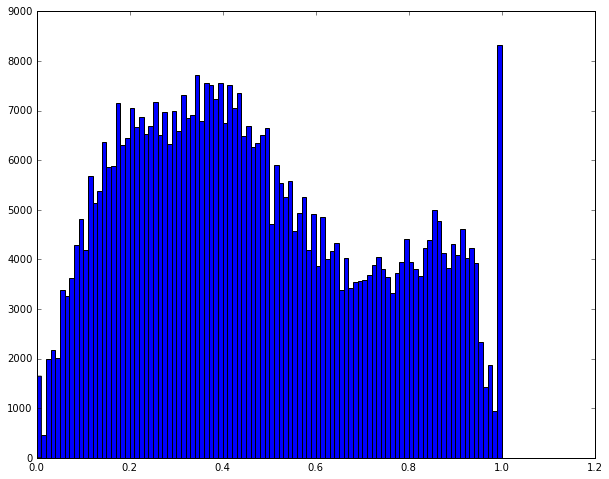

mahalanobis
matching


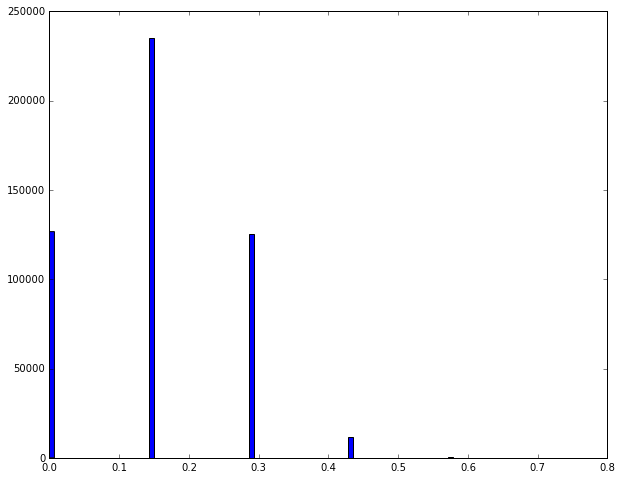

dice


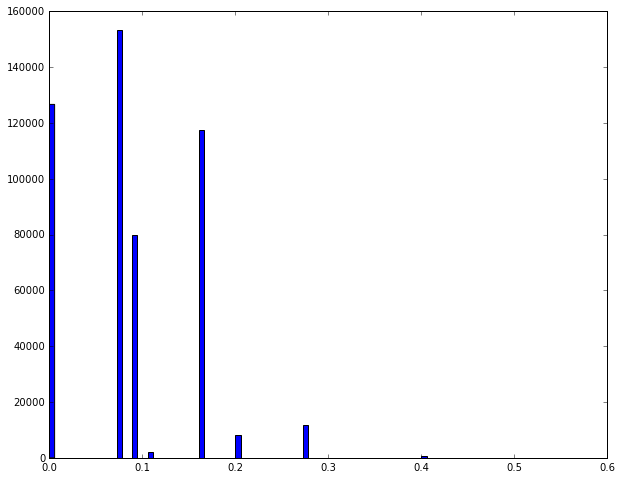

kulsinski


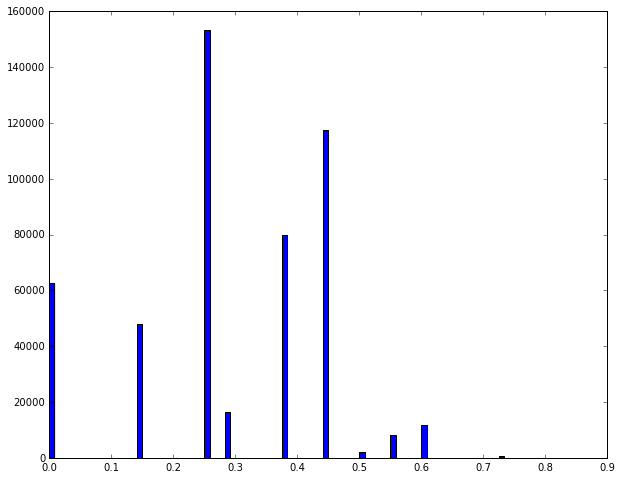

In [204]:
for name in metric_names:
    try:
        print name
        plt.clf()
        plt.figure(figsize=(10,8))
        plt.hist(Y_dict[name], bins=100)
        plt.show()
    except ValueError:
        pass